In [1]:
#  https://sci-pursuit.com/math/statistics/least-square-method.html#1

In [2]:
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, mean_squared_error
import sklearn.preprocessing as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
# データセット読み込み

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df = iris_df.rename(columns={
    0: 'sepal_length',
    1: 'sepal_width',
    2: 'petal_length',
    3: 'petal_width'})
iris_df['target'] = iris.target

# 数字のカテゴリをカテゴリ名に埋めなおしている
for i, name in enumerate(iris.target_names):
    iris_df['target'] = iris_df['target'].where(iris_df['target'] != i, name)

In [4]:
df = iris_df
df.iloc[:5]

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
dfs = df.query("target == 'setosa'")

In [6]:
dfs.iloc[:5]

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 長さと幅の回帰を見る
# 独立が長さ、従属が幅

In [7]:
import statsmodels.api as sm


#回帰分析に使うデータの指定
X = dfs.iloc[:,[0]] #説明変数
y = dfs.iloc[:,1] #目的変数


#全要素が1の列を説明変数の先頭に追加,切片をつけるために必ず必要
X = sm.add_constant(X)

#モデルの設定
model = sm.OLS(y, X)

#回帰分析の実行
results = model.fit()

#結果の詳細を表示
results.summary()

/Users/s.okubo/Documents/Projects/python_venvs/py3.7/.venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sepal_width   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     58.99
Date:                Tue, 07 May 2019   Prob (F-statistic):           6.71e-10
Time:                        12:26:58   Log-Likelihood:                -1.9002
No. Observations:                  50   AIC:                             7.800
Df Residuals:                      48   BIC:                             11.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5694      0.522     -1.091      0.281      -1.618       0.480
sepal_length     0.7985      0.104      7.681      0.000       0.589       1.008
==============================================================================
Omnibus:                        0.680   Durbin-Watson:                   2.345
Prob(Omnibus):                  0.712   Jarque-Bera (JB):                0.342
Skew:                          -0.200   Prob(JB):                        0.843
Kurtosis:                       3.060   Cond. No.                         75.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
sw_mean = dfs.sepal_width.mean()
sw_mean

3.428

In [9]:
sl_mean = dfs.sepal_length.mean()
sl_mean

5.006

In [10]:
dfs['sw_deviation'] = dfs.sepal_width - sw_mean
dfs['sl_deviation'] = dfs.sepal_length - sl_mean

dfs.head()

/Users/s.okubo/Documents/Projects/python_venvs/py3.7/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/s.okubo/Documents/Projects/python_venvs/py3.7/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,sepal_length,sepal_width,petal_length,petal_width,target,sw_deviation,sl_deviation
0,5.1,3.5,1.4,0.2,setosa,0.072,0.094
1,4.9,3.0,1.4,0.2,setosa,-0.428,-0.106
2,4.7,3.2,1.3,0.2,setosa,-0.228,-0.306
3,4.6,3.1,1.5,0.2,setosa,-0.328,-0.406
4,5.0,3.6,1.4,0.2,setosa,0.172,-0.006


In [11]:
# 説明Xの分散length
dfs['sl_squaredev'] = dfs.sl_deviation**2
dfs['sw_squaredev'] = dfs.sw_deviation**2
dfs.head()

/Users/s.okubo/Documents/Projects/python_venvs/py3.7/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/s.okubo/Documents/Projects/python_venvs/py3.7/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,sepal_length,sepal_width,petal_length,petal_width,target,sw_deviation,sl_deviation,sl_squaredev,sw_squaredev
0,5.1,3.5,1.4,0.2,setosa,0.072,0.094,0.008836,0.005184
1,4.9,3.0,1.4,0.2,setosa,-0.428,-0.106,0.011236,0.183184
2,4.7,3.2,1.3,0.2,setosa,-0.228,-0.306,0.093636,0.051984
3,4.6,3.1,1.5,0.2,setosa,-0.328,-0.406,0.164836,0.107584
4,5.0,3.6,1.4,0.2,setosa,0.172,-0.006,0.000036,0.029584


In [12]:
# length variance length X 分散値
# その他の方法
(dfs.sl_deviation**2).sum()/dfs.sepal_length.count()

0.12176400000000002

In [13]:
dfs['covariance'] = dfs.sw_deviation*dfs.loc[:,'sl_deviation']

/Users/s.okubo/Documents/Projects/python_venvs/py3.7/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
dfs.iloc[:5,:]

,sepal_length,sepal_width,petal_length,petal_width,target,sw_deviation,sl_deviation,sl_squaredev,sw_squaredev,covariance
0,5.1,3.5,1.4,0.2,setosa,0.072,0.094,0.008836,0.005184,0.006768
1,4.9,3.0,1.4,0.2,setosa,-0.428,-0.106,0.011236,0.183184,0.045368
2,4.7,3.2,1.3,0.2,setosa,-0.228,-0.306,0.093636,0.051984,0.069768
3,4.6,3.1,1.5,0.2,setosa,-0.328,-0.406,0.164836,0.107584,0.133168
4,5.0,3.6,1.4,0.2,setosa,0.172,-0.006,0.000036,0.029584,-0.001032


In [15]:
(dfs.sw_deviation*dfs.loc[:,'sl_deviation']).sum()/dfs.sepal_width.count()

0.09723199999999999

In [16]:
dfs['covariance'].sum()/dfs.sepal_width.count()

0.09723199999999999

In [17]:
# y目的がsw , X説明がsl
a = (dfs['covariance'].sum()/dfs.sepal_width.count()) /((dfs.sl_deviation**2).sum()/dfs.sepal_length.count())
a

0.7985283006471532

# a合ってた！

In [18]:
b = dfs.sepal_width.mean()-a*dfs.sepal_length.mean()
b

-0.5694326730396493

# b合ってた！

In [19]:
dfs['y_sw_x_sl_reg'] = dfs.sepal_length*a+b

/Users/s.okubo/Documents/Projects/python_venvs/py3.7/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
dfs.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target',
       'sw_deviation', 'sl_deviation', 'sl_squaredev', 'sw_squaredev',
       'covariance', 'y_sw_x_sl_reg'],
      dtype='object')

In [21]:
dfs.iloc[:5]

,sepal_length,sepal_width,petal_length,petal_width,target,sw_deviation,sl_deviation,sl_squaredev,sw_squaredev,covariance,y_sw_x_sl_reg
0,5.1,3.5,1.4,0.2,setosa,0.072,0.094,0.008836,0.005184,0.006768,3.503062
1,4.9,3.0,1.4,0.2,setosa,-0.428,-0.106,0.011236,0.183184,0.045368,3.343356
2,4.7,3.2,1.3,0.2,setosa,-0.228,-0.306,0.093636,0.051984,0.069768,3.183650
3,4.6,3.1,1.5,0.2,setosa,-0.328,-0.406,0.164836,0.107584,0.133168,3.103798
4,5.0,3.6,1.4,0.2,setosa,0.172,-0.006,0.000036,0.029584,-0.001032,3.423209


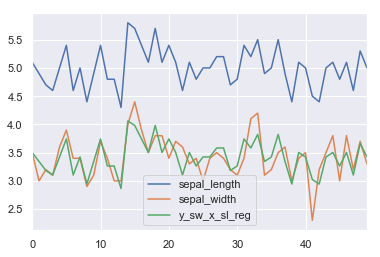

In [22]:
dfs.loc[:,['sepal_length', 'sepal_width','y_sw_x_sl_reg']].plot()

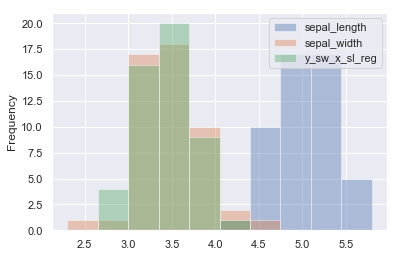

In [23]:
dfs.loc[:,['sepal_length', 'sepal_width','y_sw_x_sl_reg']].plot.hist(alpha =0.4)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


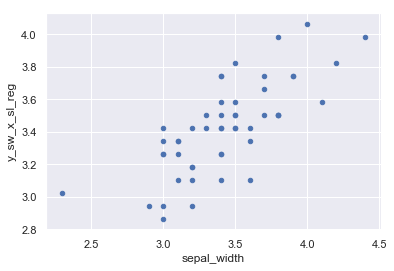

In [24]:
dfs.plot.scatter( 'sepal_width','y_sw_x_sl_reg')

In [25]:
dfss = dfs.loc[:,['sepal_length', 'sepal_width','y_sw_x_sl_reg']].sort_values('sepal_width')

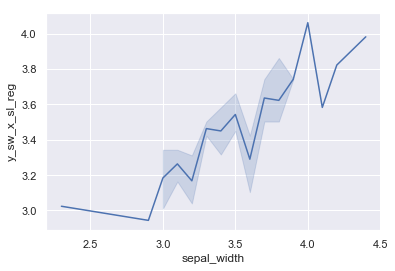

In [26]:
sns.lineplot('sepal_width','y_sw_x_sl_reg',data=dfss)